In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [5]:
dataset_dir = r"C:\Users\yashmika\Downloads\archive (14)"


In [6]:
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'validation')


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalization for validation
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\yashmika\Downloads\archive (14)\train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    r"C:\Users\yashmika\Downloads\archive (14)\validation",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [9]:
num_classes = len(train_generator.class_indices)

# Build the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Number of output classes
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Number of epochs for training
    validation_data=validation_generator
)

# Save the trained model
model.save('fruit_vegetable_classifier.h5')

C:\Users\yashmika\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\yashmika\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/98 ━━━━━━━━━━━━━━━━━━━━ 3:00 2s/step - accuracy: 0.0285 - loss: 3.6524

C:\Users\yashmika\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.0583 - loss: 3.4172 - val_accuracy: 0.2251 - val_loss: 2.5337
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.2316 - loss: 2.6028 - val_accuracy: 0.4017 - val_loss: 1.9488
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.3117 - loss: 2.2785 - val_accuracy: 0.4558 - val_loss: 1.7105
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.3466 - loss: 2.1539 - val_accuracy: 0.5128 - val_loss: 1.5880
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.4167 - loss: 1.9078 - val_accuracy: 0.5271 - val_loss: 1.4930
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.4079 - loss: 1.9187 - val_accuracy: 0.5926 - val_loss: 1.2501
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.4704 - loss: 1.7048 - val_accuracy: 0.6382 - val_loss: 1.1332
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.4978 - loss: 1.6113 - val_accuracy: 0.6752 - val_loss: 1.

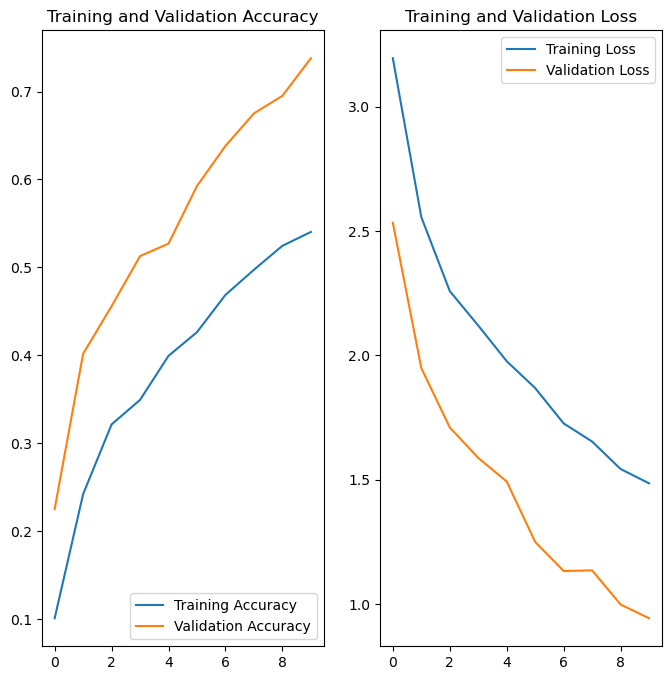

In [11]:
import matplotlib.pyplot as plt

# Assuming the model was trained with 10 epochs
epochs_range = range(10)  # Adjust this number to match the actual number of epochs used

# Extracting accuracy and validation accuracy from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Extracting loss and validation loss from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


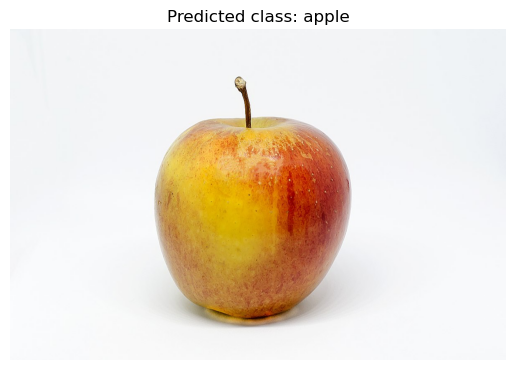

Given image is recognized as: apple


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Assuming you have already trained the model and have class_names

# Load and preprocess the input image
def preprocess_image(img_path, img_size=128):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image to [0, 1] range
    return img_array

# Predict the class of the input image
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    
    # Display the input image
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted class: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()
    
    # Print the predicted class
    print(f"Given image is recognized as: {class_names[predicted_class]}")
    
# Example usage
img_path = r"C:\Users\yashmika\Downloads\archive (14)\train\apple\Image_24.jpg"
predict_image(model, img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


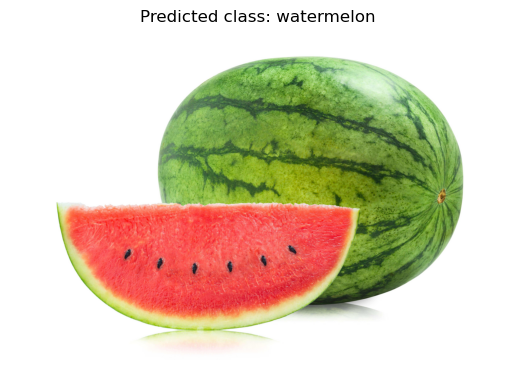

Given image is recognized as: watermelon


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Assuming you have already trained the model and have class_names

# Load and preprocess the input image
def preprocess_image(img_path, img_size=128):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image to [0, 1] range
    return img_array

# Predict the class of the input image
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    
    # Display the input image
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted class: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()
    
    # Print the predicted class
    print(f"Given image is recognized as: {class_names[predicted_class]}")
    
# Example usage
img_path = r"C:\Users\yashmika\Downloads\archive (14)\train\watermelon\Image_81.jpg"
predict_image(model, img_path)
